In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
for i in range(2011, 2022):
    dft = pd.read_csv("data" + str(i) + ".csv")
    if i == 2011:
        df = dft
    else:
        df = pd.concat([df, dft], ignore_index = True)

df.shape

(2582, 7)

In [17]:
df.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
2577,02-Jun-2021,35271.60,35415.85,35070.30,35373.75,591363574,8204.85
2578,03-Jun-2021,35536.45,35723.70,35413.00,35649.00,421766510,8052.52
2579,04-Jun-2021,35657.85,35810.90,35176.15,35291.65,282780039,6361.13
2580,07-Jun-2021,35460.80,35545.85,35338.55,35443.65,253219977,4479.08
2581,08-Jun-2021,35433.80,35449.50,34962.65,35085.30,214827767,4957.91


In [18]:
df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Shares Traded         object
Turnover (Rs. Cr)     object
dtype: object

In [25]:
df["Shares Traded"] = pd.to_numeric(df["Shares Traded"])

ValueError: Unable to parse string "-" at position 1682

In [29]:
df["Shares Traded"][1680:1685]

1680           89300075
1681          118314121
1682                NaN
1683          161557992
1684                NaN
Name: Shares Traded, dtype: object

In [28]:
df["Shares Traded"] = df["Shares Traded"].replace('-', np.nan)

In [35]:
df.isnull().any()

Date                 False
Open                 False
High                 False
Low                  False
Close                False
Shares Traded         True
Turnover (Rs. Cr)     True
dtype: bool

In [34]:
df["Turnover (Rs. Cr)"] = df["Turnover (Rs. Cr)"].replace('-', np.nan)

In [36]:
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Shares Traded        10
Turnover (Rs. Cr)    10
dtype: int64

In [37]:
df.dropna(axis = 0, inplace = True)

In [38]:
df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
dtype: int64

In [39]:
df["Shares Traded"] = pd.to_numeric(df["Shares Traded"])

In [40]:
df["Turnover (Rs. Cr)"] = pd.to_numeric(df["Turnover (Rs. Cr)"])

In [41]:
df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Shares Traded          int64
Turnover (Rs. Cr)    float64
dtype: object

In [42]:
y = df["Turnover (Rs. Cr)"]
x = df.drop(columns = ["Date", "Turnover (Rs. Cr)"], axis = "columns")
x.head()

,Open,High,Low,Close,Shares Traded
0,11882.10,11912.15,11826.95,11855.75,8895927
1,11868.40,11872.80,11545.55,11564.05,16041214
2,11545.75,11545.75,11265.55,11305.45,19689201
3,11350.70,11377.10,11164.75,11186.80,19559984
4,11146.45,11258.50,11007.90,11053.35,25192954


In [43]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,2572.000000,2572.000000,2572.000000,2572.000000,2.572000e+03,2572.000000
mean,19146.647123,19297.903188,18964.352449,19130.922803,1.331720e+08,3755.772208
std,7395.891328,7438.534256,7336.981200,7388.995309,1.590522e+08,3143.230620
min,7948.450000,7961.700000,7766.350000,7798.550000,1.030481e+06,86.610000
25%,11603.712500,11730.637500,11518.525000,11614.437500,2.557063e+07,1713.325000
50%,18425.800000,18584.675000,18267.450000,18421.925000,6.875764e+07,2437.185000
75%,25382.587500,25498.225000,25149.012500,25335.400000,1.799791e+08,4792.130000
max,37492.600000,37708.750000,36764.250000,37306.250000,1.568143e+09,24845.740000


In [44]:
cut = int(df.shape[0]*0.75)
rows = df.shape[0]
x_train = x[0:cut]
x_test = x[cut : rows]
y_train = y[0:cut]
y_test = y[cut : rows]

In [45]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(rmse)
r2

7288499.044989731


0.3120647493360107

In [46]:
x_train.shape

(1929, 5)

In [47]:
train_pred = model.predict(x_train)
rmse = mean_squared_error(y_train, train_pred)
r2 = r2_score(y_train, train_pred)
print(rmse)
r2


387277.8909942533


0.7987901061518826

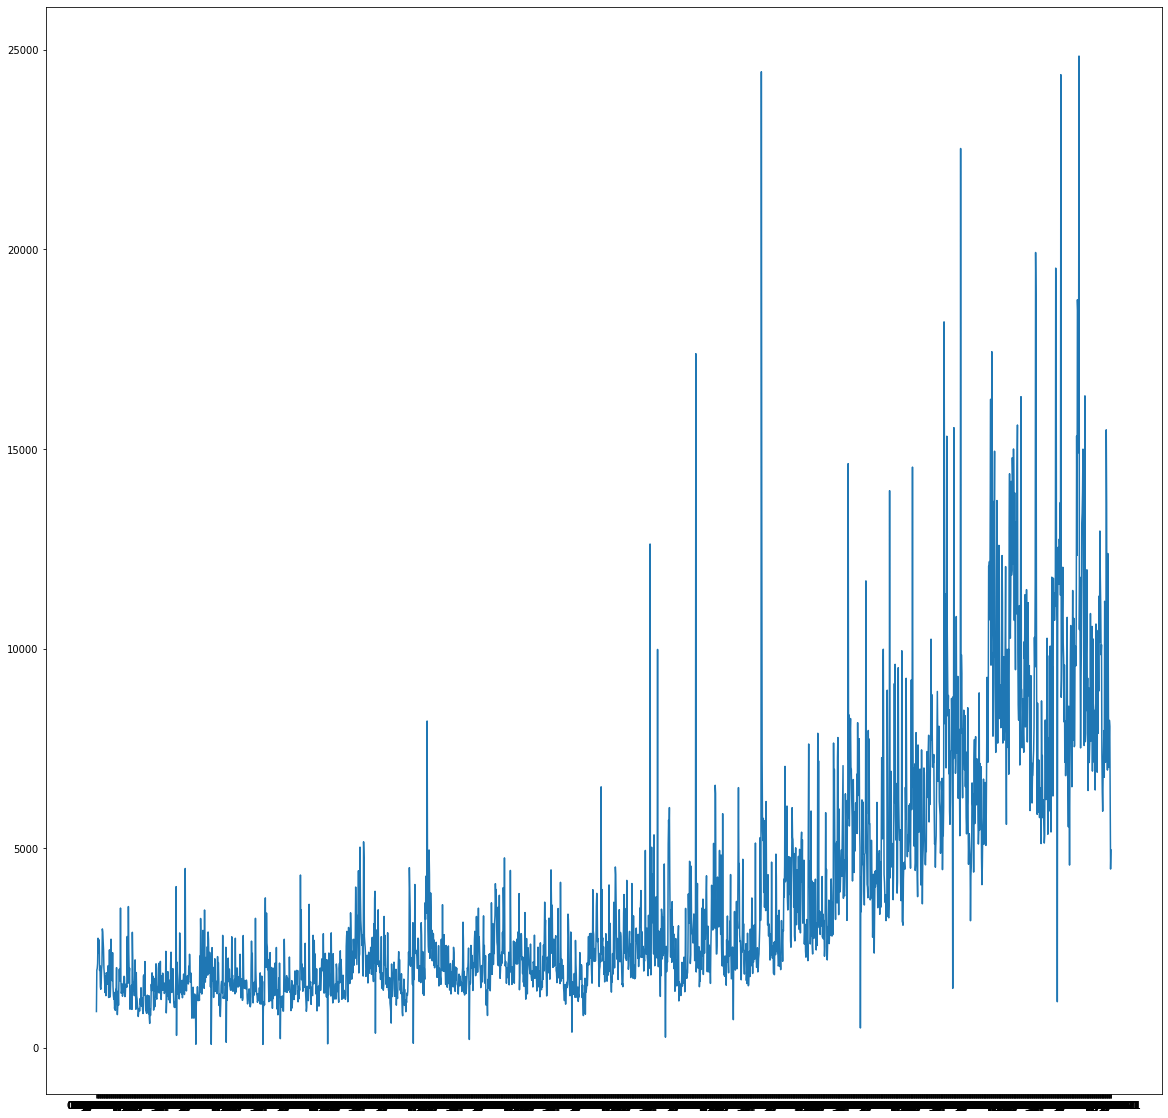

In [49]:
plt.figure(figsize = (20,20))
plt.plot(df["Date"],df["Turnover (Rs. Cr)"])

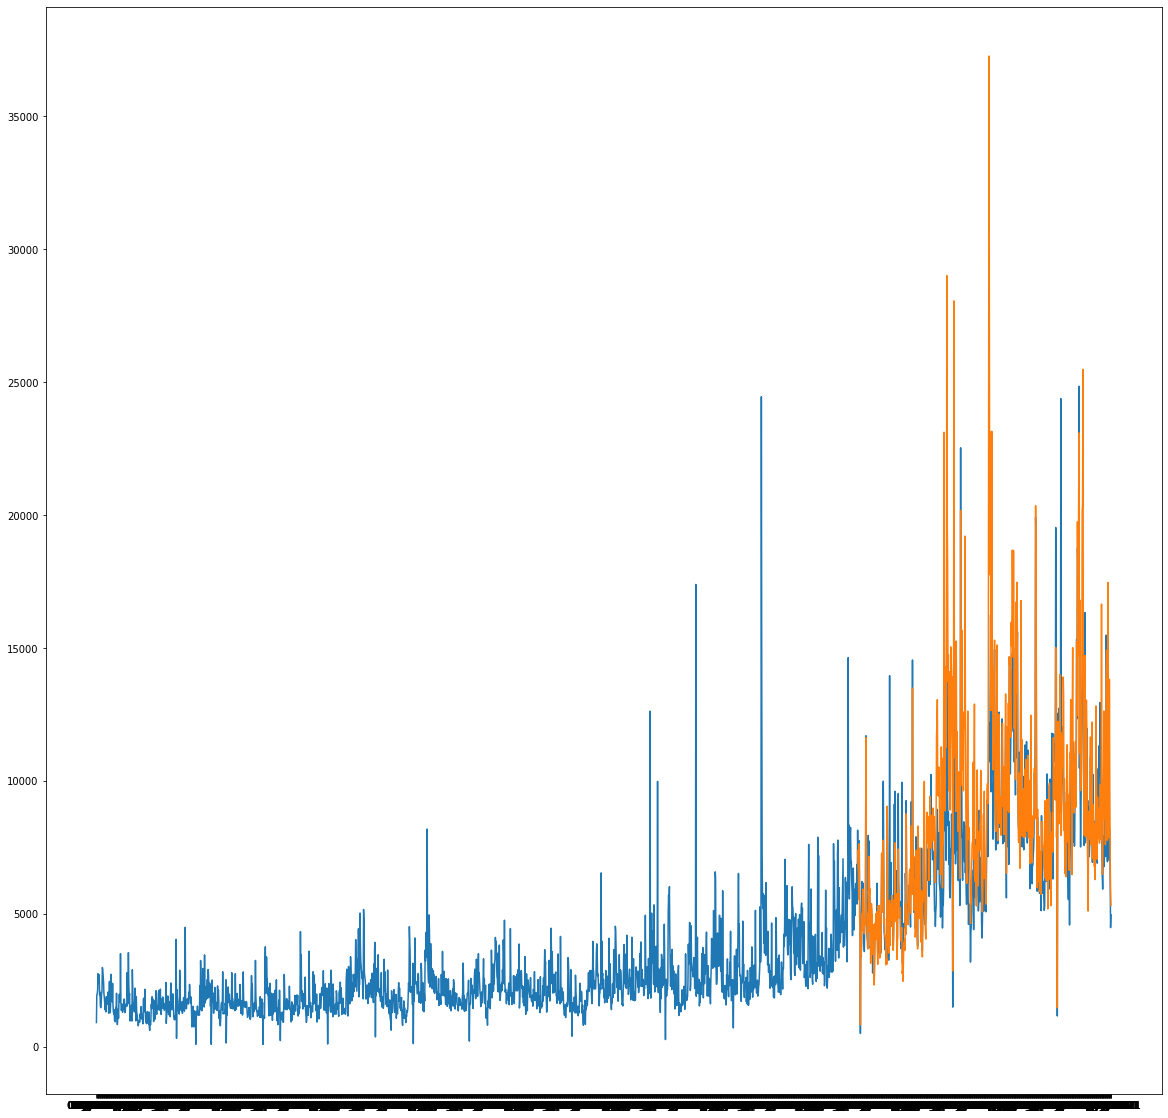

In [51]:
plt.figure(figsize = (20,20))
plt.plot(df["Date"],df["Turnover (Rs. Cr)"])
plt.plot(df["Date"], [None for y in y_train] + [y for y in y_pred])

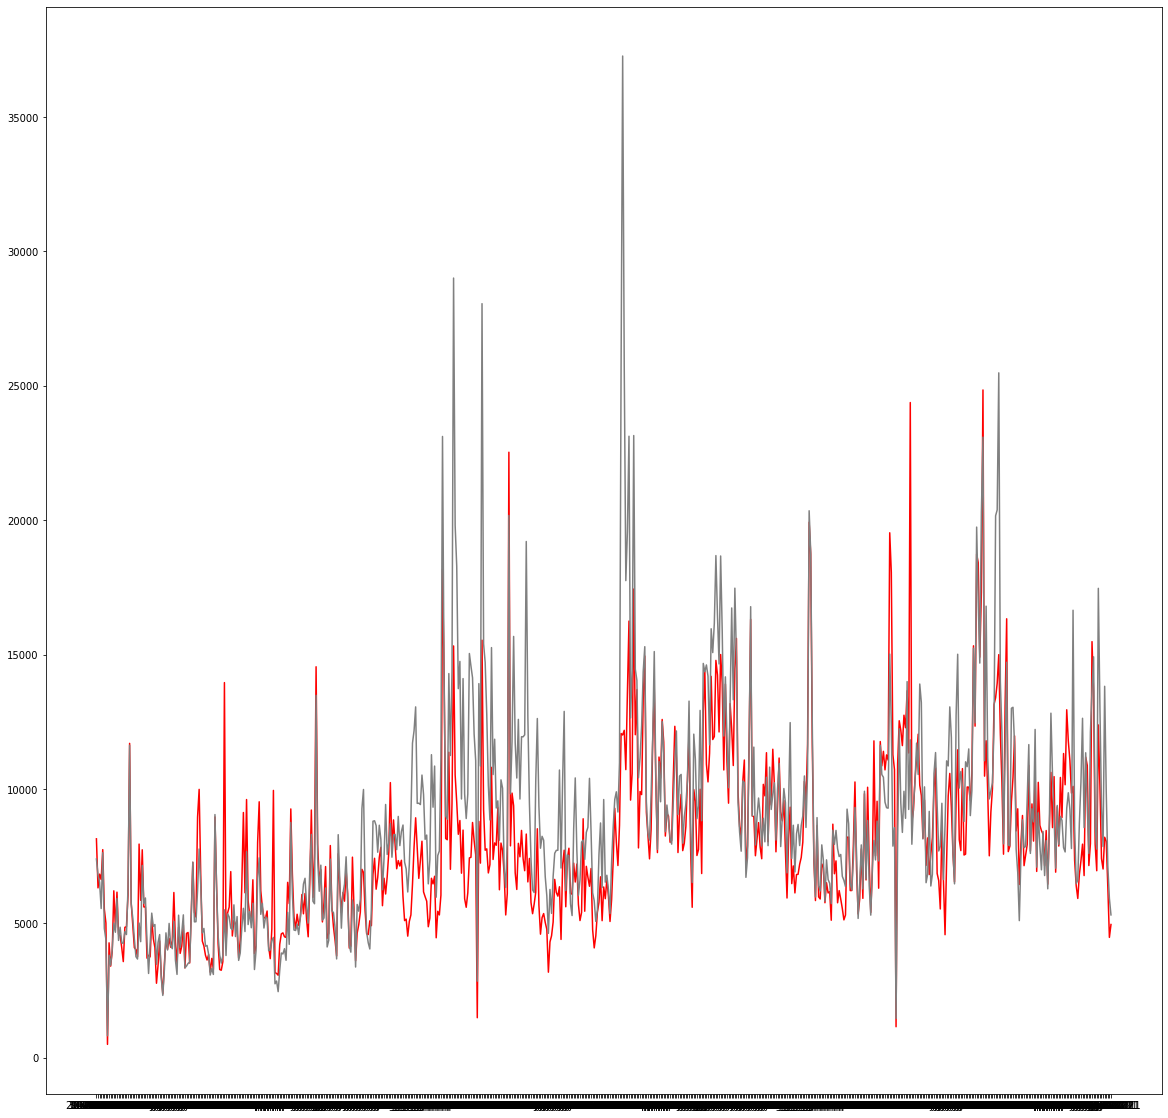

In [52]:
temp = df[cut:rows]
plt.figure(figsize = (20,20))
plt.plot(temp["Date"],y_test, color = 'red')
plt.plot(temp["Date"], y_pred, color = 'grey')

In [56]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)


rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("For test set: ")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

For test set: 
RMSE:  7676532.685912417
R2 Score:  0.27543964746161176


In [55]:
train_pred = RF.predict(x_train)
rmse = mean_squared_error(y_train, train_pred)
r2 = r2_score(y_train, train_pred)
print("For training set:- ")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

For training set:- 
RMSE:  63184.74948180363
R2 Score:  0.9671724179673292


### The training set r2 score is very good while test set r2 score is less indicating that the model is overfitting the training data, with more data we can overcome the problem of overfitting.